# Εργαστήριο 5 - Απαντήσεις

In [ ]:
import qiskit as qlib
qlib.IBMQ.load_accounts()

## Άκσηση 5.1

In [2]:
def show_me(be_name):
    backend = qlib.IBMQ.get_backend(be_name)
    conf = backend.configuration()
    print("Πύλες: {}".format(conf.basis_gates))
    # To 'ibmq_qasm_simulator' δεν εχει coupling_map
    if conf.backend_name != "ibmq_qasm_simulator":
        for a_gate in range(len(conf.basis_gates)):
            if conf.gates[a_gate].name == 'cx':
                print(conf.gates[a_gate].coupling_map)
    
for i in qlib.IBMQ.backends():
    show_me(i.name())

Πύλες: ['u1', 'u2', 'u3', 'cx', 'id']
[[1, 0], [2, 0], [2, 1], [3, 2], [3, 4], [4, 2]]
Πύλες: ['u1', 'u2', 'u3', 'cx', 'id']
[[0, 1], [0, 2], [1, 2], [3, 2], [3, 4], [4, 2]]
Πύλες: ['u1', 'u2', 'u3', 'cx', 'id']
[[1, 0], [1, 2], [2, 3], [4, 3], [4, 10], [5, 4], [5, 6], [5, 9], [6, 8], [7, 8], [9, 8], [9, 10], [11, 3], [11, 10], [11, 12], [12, 2], [13, 1], [13, 12]]
Πύλες: ['u1', 'u2', 'u3', 'cx', 'cz', 'id', 'x', 'y', 'z', 'h', 's', 'sdg', 't', 'tdg', 'ccx', 'swap', 'unitary', 'initialize', 'kraus']


## Άσκηση 5.2

```python
backend = qlib.IBMQ.get_backend("ibmq_qasm_simulator")

# circuits
qr = qlib.QuantumRegister(2,'q')
cr = qlib.ClassicalRegister(2, 'c')
circuit1 = qlib.QuantumCircuit(qr, cr)
...
circuit2 = ...

# compilation κυκλώματος
cc1 = qlib.compile(circuit1, backend)
cc2 = qlib.compile(circuit2, backend)
cc3 = qlib.compile(circuit3, backend)
```

## Άσκηση 5.3

In [3]:
def show_results(a_job):
    results = a_job.result()
    print("Status: " + results.status)
    print("Ημερομηνία εκτέλεσης: " + a_job.creation_date())
    print("Backend: " + results.backend_name)
    print("Αποτελέσματα μετρήσεων:")
    print(results.get_counts())

## Άσκηση 5.4

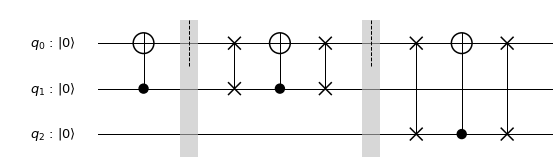

In [5]:
coupling_map = [[1, 0], [2, 0], [2, 1], [3, 2], [3, 4], [4, 2]]

def my_cx(circuit, qr, q0, q1):
    if [q0,q1] in coupling_map:
        circuit.cx(qr[q0], qr[q1])
    elif [q1,q0] in coupling_map:
        circuit.swap(qr[q0], qr[q1])
        circuit.cx(qr[q1], qr[q0])
        circuit.swap(qr[q0], qr[q1])
    else:
        print("tricky")
        
q = qlib.QuantumRegister(3, 'q')
circuit = qlib.QuantumCircuit(q)
my_cx(circuit, q, 1, 0)
circuit.barrier()
my_cx(circuit, q, 0, 1)
circuit.barrier()
my_cx(circuit, q, 0, 2)
circuit.draw(output='mpl')